In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch
from sklearn.cluster import KMeans

In [2]:
pip install statsbombpy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from statsbombpy import sb
sb.matches(competition_id=37, season_id=4)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,19770,2018-12-02,13:30:00.000,England - FA Women's Super League,2018/2019,Manchester City WFC,Arsenal WFC,2,0,available,...,2021-06-13T16:17:31.694,11,Regular Season,Academy Stadium,Abigail Marriott,Nick Cushing,Joseph Montemurro,1.0.3,None,None
1,19820,2019-05-11,13:30:00.000,England - FA Women's Super League,2018/2019,Reading WFC,Chelsea FCW,2,3,available,...,2021-06-13T16:17:31.694,22,Regular Season,Adams Park,Abigail Byrne,Kelly Chambers,Emma Hayes,1.1.0,2,None
2,19772,2018-12-02,15:00:00.000,England - FA Women's Super League,2018/2019,Chelsea FCW,Reading WFC,1,0,available,...,2021-06-13T16:17:31.694,11,Regular Season,Kingsmeadow,Lucy Oliver,Emma Hayes,Kelly Chambers,1.0.3,None,None
3,19769,2018-12-02,15:00:00.000,England - FA Women's Super League,2018/2019,Brighton & Hove Albion WFC,West Ham United LFC,0,1,available,...,2021-06-13T16:17:31.694,11,Regular Season,Broadfield Stadium,Kirsty Dowle,Hope Patricia Powell,Matt Beard,1.0.3,None,None
4,19746,2018-10-28,15:00:00.000,England - FA Women's Super League,2018/2019,Everton LFC,West Ham United LFC,1,2,available,...,2021-06-13T16:17:31.694,7,Regular Season,Haig Avenue,Aaron Jackson,Andy Spence,Matt Beard,1.0.3,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,19754,2019-03-24,13:30:00.000,England - FA Women's Super League,2018/2019,Liverpool WFC,Arsenal WFC,1,5,available,...,2021-06-13T16:17:31.694,16,Regular Season,Prenton Park,Helen Conley,Victoria Jepson,Joseph Montemurro,1.1.0,None,None
104,19724,2018-09-23,15:00:00.000,England - FA Women's Super League,2018/2019,Arsenal WFC,West Ham United LFC,4,3,available,...,2021-06-13T16:17:31.694,3,Regular Season,Meadow Park,Paul Howard,Joseph Montemurro,Matt Beard,1.0.3,None,None
105,19814,2019-04-28,16:00:00.000,England - FA Women's Super League,2018/2019,Bristol City WFC,West Ham United LFC,1,2,available,...,2021-06-13T16:17:31.694,21,Regular Season,Stoke Gifford Stadium,Richard Hulme,Tanya Oxtoby,Matt Beard,1.1.0,2,None
106,19729,2019-03-24,16:00:00.000,England - FA Women's Super League,2018/2019,Bristol City WFC,Everton LFC,1,0,available,...,2021-06-13T16:17:31.694,4,Regular Season,Stoke Gifford Stadium,Stacey Pearson,Tanya Oxtoby,Willie Kirk,1.1.0,None,None


In [4]:
df = sb.events(match_id=19724)
df.head()

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",Arsenal WFC,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",West Ham United LFC,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal WFC,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,West Ham United LFC,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,West Ham United LFC,00:00:00.000,Half Start,NaN


In [5]:
df.columns.tolist()

['ball_receipt_outcome',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'block_offensive',
 'block_save_block',
 'carry_end_location',
 'counterpress',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_offensive',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_position',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id',
 'index',
 'interception_outcome',
 'location',
 'match_id',
 'minute',
 'off_camera',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_backheel',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_deflected',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_length',
 'pass_outcome',
 'pass_recipient',
 'pass_shot_assist',
 'pass_switch',
 'pass_technique',
 'pass_through_ball',
 'pass_type',
 'peri

In [6]:
df = df[['id', 'index','match_id', 'minute', 'duration','timestamp', 'period','team', 'possession_team', 'play_pattern', 'player','position', 'player_id', 'type',
       'pass_type', 'pass_length', 'location', 'pass_end_location', 'carry_end_location' ,'shot_statsbomb_xg','tactics','shot_outcome']]
df = df.sort_values(by='minute', ascending=True)
df.head()

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,player_id,type,pass_type,pass_length,location,pass_end_location,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.0,00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN
958,d82e4864-ac1c-49f5-9ff1-93b505718d91,12,19724,0,NaN,00:00:09.940,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,15621.0,Ball Receipt*,NaN,NaN,"[36.0, 45.0]",NaN,NaN,NaN,NaN,NaN
959,de5bc890-eea2-4ee8-bc4b-ed2e8ac64924,15,19724,0,NaN,00:00:12.491,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,18999.0,Ball Receipt*,NaN,NaN,"[47.0, 68.0]",NaN,NaN,NaN,NaN,NaN
960,2502b4e4-0d3a-4d33-bbe5-9254a12eaabb,18,19724,0,NaN,00:00:16.103,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,10666.0,Ball Receipt*,NaN,NaN,"[70.0, 78.0]",NaN,NaN,NaN,NaN,NaN
961,61b93d1e-b45e-4b1a-8144-844643a4b2a5,21,19724,0,NaN,00:00:19.473,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,18999.0,Ball Receipt*,NaN,NaN,"[55.0, 77.0]",NaN,NaN,NaN,NaN,NaN


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df_sorted = df.sort_values(by=['minute', 'timestamp'], ascending=[True, True])
df_sorted

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,player_id,type,pass_type,pass_length,location,pass_end_location,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN
3,acb73ef0-677f-419f-a82d-40e228b5c3bb,4,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d0d6f8f-2d6e-4338-9ab0-507a792f6b10,3,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33ada7be-58e1-4a5e-8b01-4cedb89822fb,2,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",NaN
6,3b77812a-b94a-407c-9eb7-066fbe1b1301,5,19724,0,1.399618,2023-07-30 00:00:02.163,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,15623.0,Pass,Kick Off,14.317822,"[61.0, 41.0]","[47.0, 44.0]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,a6cb1f9a-03e5-4255-9579-94f3eda62a31,3129,19724,93,1.093544,2023-07-30 00:48:10.610,2,West Ham United LFC,Arsenal WFC,From Throw In,...,18150.0,Carry,NaN,NaN,"[4.0, 68.0]",NaN,"[4.0, 72.0]",NaN,NaN,NaN
2971,690036ee-f5b2-4637-9d00-9693dd023b71,3131,19724,93,0.000000,2023-07-30 00:48:11.703,2,West Ham United LFC,Arsenal WFC,From Throw In,...,18150.0,Foul Won,NaN,NaN,"[4.0, 72.0]",NaN,NaN,NaN,NaN,NaN
2951,33bb375b-2f58-4e96-aad6-081f50552021,3130,19724,93,0.000000,2023-07-30 00:48:11.703,2,Arsenal WFC,Arsenal WFC,From Throw In,...,15623.0,Foul Committed,NaN,NaN,"[117.0, 9.0]",NaN,NaN,NaN,NaN,NaN
3128,9555a1cf-cb64-49a1-9030-92d8cdfe758b,3132,19724,93,0.000000,2023-07-30 00:48:17.260,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Tactical Shift

In [62]:
tacticaltime = df_sorted[df_sorted['type'] == 'Tactical Shift']
tacticaltime['timestamp'] = pd.to_timedelta(tacticaltime['timestamp'].dt.strftime('%H:%M:%S'))
tacticaltime['timestamp'] = tacticaltime['timestamp'].astype(str).str[7:]


tacticaltime_first = tacticaltime[tacticaltime['period'] == 1]
tacticaltime_second = tacticaltime[tacticaltime['period'] == 2]
tacticaltime_second

C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\4293353545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacticaltime['timestamp'] = pd.to_timedelta(tacticaltime['timestamp'].dt.strftime('%H:%M:%S'))
C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\4293353545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacticaltime['timestamp'] = tacticaltime['timestamp'].astype(str).str[7:]


,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y
3124,413cc29e-ef85-47f5-bd8a-16ffb239138a,2308,19724,69,0.0,00:24:54,2,Arsenal WFC,West Ham United LFC,Regular Play,...,nan,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN,nan,NaN,nan,NaN,nan,NaN


# Substitutions

In [9]:
sub = df_sorted[df_sorted['type'] == 'Substitution']
sub['timestamp'] = pd.to_timedelta(sub['timestamp'].dt.strftime('%H:%M:%S'))
sub['timestamp'] = sub['timestamp'].astype(str).str[7:]


subfirst = sub[sub['period'] == 1]
subsecond = sub[sub['period'] == 2]
sub

C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\2066168161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['timestamp'] = pd.to_timedelta(sub['timestamp'].dt.strftime('%H:%M:%S'))
C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\2066168161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['timestamp'] = sub['timestamp'].astype(str).str[7:]


,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,player_id,type,pass_type,pass_length,location,pass_end_location,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome
3130,632b2f9f-b395-4a3a-b534-b9107c63f25f,2306,19724,69,0.0,00:24:35,2,Arsenal WFC,West Ham United LFC,Regular Play,...,15620.0,Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3131,9bf16dec-4574-401f-8aae-0480fe7f7cdf,2307,19724,69,0.0,00:24:35,2,Arsenal WFC,West Ham United LFC,Regular Play,...,15621.0,Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3132,f4e33194-5202-46c1-a6c8-c0cd717a044c,2389,19724,72,0.0,00:27:44,2,West Ham United LFC,Arsenal WFC,From Throw In,...,18146.0,Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Goals

In [61]:
goal = df_sorted[df_sorted['shot_outcome'] == 'Goal']
goal['timestamp'] = pd.to_timedelta(goal['timestamp'].dt.strftime('%H:%M:%S'))
goal['timestamp'] = goal['timestamp'].astype(str).str[7:]


goalfirst = goal[goal['period'] == 1]
goalsecond = goal[goal['period'] == 2]
goalsecond

C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\2047983197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goal['timestamp'] = pd.to_timedelta(goal['timestamp'].dt.strftime('%H:%M:%S'))
C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\2047983197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goal['timestamp'] = goal['timestamp'].astype(str).str[7:]


,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y
2709,3ff97f32-d1d6-4af0-9d84-ad0e7472773e,2079,19724,61,0.480518,00:16:42,2,Arsenal WFC,Arsenal WFC,From Corner,...,nan,0.303851,NaN,Goal,117.0,40.0,nan,NaN,nan,NaN
2711,e143fae8-dfd8-4c71-a29f-6d24dffdca0d,2387,19724,72,1.156795,00:27:07,2,Arsenal WFC,Arsenal WFC,From Throw In,...,nan,0.021783,NaN,Goal,88.0,35.0,nan,NaN,nan,NaN
2716,5f7f8d36-aa5f-4a98-8754-0a916bb9b181,2870,19724,84,1.798148,00:39:55,2,West Ham United LFC,West Ham United LFC,From Free Kick,...,nan,0.007327,NaN,Goal,111.0,67.0,nan,NaN,nan,NaN


In [11]:
json_df = pd.json_normalize(tacticaltime['tactics'])
print(json_df)


   formation                                             lineup
0      41221  [{'player': {'id': 15615, 'name': 'Pauline Pey...
1      41221  [{'player': {'id': 15615, 'name': 'Pauline Pey...


In [12]:
unique_values_with_count = df_sorted.groupby('team')['shot_outcome'].value_counts()
unique_values_with_count

team                 shot_outcome
Arsenal WFC          Saved           7
                     Blocked         6
                     Goal            4
                     Off T           4
                     Wayward         3
                     Post            1
West Ham United LFC  Goal            3
                     Wayward         2
                     Blocked         1
                     Off T           1
                     Saved           1
Name: shot_outcome, dtype: int64

In [13]:
unique_values_with_count = df_sorted.groupby('team')['type'].value_counts()
unique_values_with_count

team                 type             
Arsenal WFC          Pass                 544
                     Carry                475
                     Ball Receipt*        429
                     Ball Recovery         69
                     Pressure              57
                     Shot                  25
                     Dribble               24
                     Block                 19
                     Miscontrol            18
                     Duel                  16
                     Dispossessed          13
                     Goal Keeper           13
                     Interception          13
                     Foul Committed        11
                     Dribbled Past         10
                     Foul Won               9
                     Clearance              5
                     Half End               2
                     Half Start             2
                     Injury Stoppage        2
                     Substitution        

In [14]:
df_sorted

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,player_id,type,pass_type,pass_length,location,pass_end_location,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN
3,acb73ef0-677f-419f-a82d-40e228b5c3bb,4,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d0d6f8f-2d6e-4338-9ab0-507a792f6b10,3,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33ada7be-58e1-4a5e-8b01-4cedb89822fb,2,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",NaN
6,3b77812a-b94a-407c-9eb7-066fbe1b1301,5,19724,0,1.399618,2023-07-30 00:00:02.163,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,15623.0,Pass,Kick Off,14.317822,"[61.0, 41.0]","[47.0, 44.0]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,a6cb1f9a-03e5-4255-9579-94f3eda62a31,3129,19724,93,1.093544,2023-07-30 00:48:10.610,2,West Ham United LFC,Arsenal WFC,From Throw In,...,18150.0,Carry,NaN,NaN,"[4.0, 68.0]",NaN,"[4.0, 72.0]",NaN,NaN,NaN
2971,690036ee-f5b2-4637-9d00-9693dd023b71,3131,19724,93,0.000000,2023-07-30 00:48:11.703,2,West Ham United LFC,Arsenal WFC,From Throw In,...,18150.0,Foul Won,NaN,NaN,"[4.0, 72.0]",NaN,NaN,NaN,NaN,NaN
2951,33bb375b-2f58-4e96-aad6-081f50552021,3130,19724,93,0.000000,2023-07-30 00:48:11.703,2,Arsenal WFC,Arsenal WFC,From Throw In,...,15623.0,Foul Committed,NaN,NaN,"[117.0, 9.0]",NaN,NaN,NaN,NaN,NaN
3128,9555a1cf-cb64-49a1-9030-92d8cdfe758b,3132,19724,93,0.000000,2023-07-30 00:48:17.260,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_sorted['location'] = df_sorted['location'].astype(str)
df_sorted['pass_end_location'] = df_sorted['pass_end_location'].astype(str)
df_sorted['carry_end_location'] = df_sorted['carry_end_location'].astype(str)

#df_sb_events['shot_freeze_frame'] = df_sb_events['shot_freeze_frame'].astype(str)


##

###
df_sorted['location'] = df_sorted['location'].str.replace('[','')
df_sorted['pass_end_location'] = df_sorted['pass_end_location'].str.replace('[','')
df_sorted['carry_end_location'] = df_sorted['carry_end_location'].str.replace('[','')

#df_sb_events['shot_freeze_frame'] = df_sb_events['shot_freeze_frame'].str.replace('[','')

###
df_sorted['location'] = df_sorted['location'].str.replace(']','')
df_sorted['pass_end_location'] = df_sorted['pass_end_location'].str.replace(']','')
df_sorted['carry_end_location'] = df_sorted['carry_end_location'].str.replace(']','')



## Break down each location attributes
df_sorted['location_x'], df_sorted['location_y'] = df_sorted['location'].str.split(',', 1).str
df_sorted['pass_end_location_x'], df_sorted['pass_end_location_y'] = df_sorted['pass_end_location'].str.split(',', 1).str
df_sorted['carry_end_location_x'], df_sorted['carry_end_location_y'] = df_sorted['carry_end_location'].str.split(',', 1).str


## Display DataFrame
df_sorted.head(20)

C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\767832069.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sorted['location'] = df_sorted['location'].str.replace('[','')
C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\767832069.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sorted['pass_end_location'] = df_sorted['pass_end_location'].str.replace('[','')
C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\767832069.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sorted['carry_end_location'] = 

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,nan,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN,nan,NaN,nan,NaN,nan,NaN
3,acb73ef0-677f-419f-a82d-40e228b5c3bb,4,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,nan,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
2,7d0d6f8f-2d6e-4338-9ab0-507a792f6b10,3,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,nan,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
1,33ada7be-58e1-4a5e-8b01-4cedb89822fb,2,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,nan,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",NaN,nan,NaN,nan,NaN,nan,NaN
6,3b77812a-b94a-407c-9eb7-066fbe1b1301,5,19724,0,1.399618,2023-07-30 00:00:02.163,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,nan,NaN,NaN,NaN,61.0,41.0,47.0,44.0,nan,NaN
1677,fe85cf7f-bf83-4ac2-97fa-b291b1c19d71,7,19724,0,0.874282,2023-07-30 00:00:03.563,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,"47.0, 44.0",NaN,NaN,NaN,47.0,44.0,nan,NaN,47.0,44.0
956,397fb6fa-cde5-47b1-be80-7fce31faf270,6,19724,0,NaN,2023-07-30 00:00:03.563,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,nan,NaN,NaN,NaN,47.0,44.0,nan,NaN,nan,NaN
7,36b9f2c3-b488-4f00-bb18-dcb348f8dcc0,8,19724,0,1.606100,2023-07-30 00:00:04.437,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,nan,NaN,NaN,NaN,47.0,44.0,40.0,73.0,nan,NaN
1678,01996f19-933c-4dfb-9758-f6c04dc56781,10,19724,0,1.733000,2023-07-30 00:00:06.043,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,"40.0, 73.0",NaN,NaN,NaN,40.0,73.0,nan,NaN,40.0,73.0
957,3d2fdf2f-db86-4970-98d7-f8f4d5cabb65,9,19724,0,NaN,2023-07-30 00:00:06.043,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,nan,NaN,NaN,NaN,40.0,73.0,nan,NaN,nan,NaN


In [16]:
dfnew = df_sorted.drop(columns=['location', 'pass_end_location', 'carry_end_location'])
dfnew

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,pass_length,shot_statsbomb_xg,tactics,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN,nan,NaN,nan,NaN,nan,NaN
3,acb73ef0-677f-419f-a82d-40e228b5c3bb,4,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
2,7d0d6f8f-2d6e-4338-9ab0-507a792f6b10,3,19724,0,0.000000,2023-07-30 00:00:00.000,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
1,33ada7be-58e1-4a5e-8b01-4cedb89822fb,2,19724,0,0.000000,2023-07-30 00:00:00.000,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",NaN,nan,NaN,nan,NaN,nan,NaN
6,3b77812a-b94a-407c-9eb7-066fbe1b1301,5,19724,0,1.399618,2023-07-30 00:00:02.163,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,14.317822,NaN,NaN,NaN,61.0,41.0,47.0,44.0,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,a6cb1f9a-03e5-4255-9579-94f3eda62a31,3129,19724,93,1.093544,2023-07-30 00:48:10.610,2,West Ham United LFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,4.0,68.0,nan,NaN,4.0,72.0
2971,690036ee-f5b2-4637-9d00-9693dd023b71,3131,19724,93,0.000000,2023-07-30 00:48:11.703,2,West Ham United LFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,4.0,72.0,nan,NaN,nan,NaN
2951,33bb375b-2f58-4e96-aad6-081f50552021,3130,19724,93,0.000000,2023-07-30 00:48:11.703,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,117.0,9.0,nan,NaN,nan,NaN
3128,9555a1cf-cb64-49a1-9030-92d8cdfe758b,3132,19724,93,0.000000,2023-07-30 00:48:17.260,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN


In [17]:
dfnew['timestamp'] = pd.to_datetime(dfnew['timestamp'])

dfnew['timestamp'] = dfnew['timestamp'].dt.time
dfnew

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,pass_length,shot_statsbomb_xg,tactics,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.000000,00:00:00,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN,nan,NaN,nan,NaN,nan,NaN
3,acb73ef0-677f-419f-a82d-40e228b5c3bb,4,19724,0,0.000000,00:00:00,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
2,7d0d6f8f-2d6e-4338-9ab0-507a792f6b10,3,19724,0,0.000000,00:00:00,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
1,33ada7be-58e1-4a5e-8b01-4cedb89822fb,2,19724,0,0.000000,00:00:00,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",NaN,nan,NaN,nan,NaN,nan,NaN
6,3b77812a-b94a-407c-9eb7-066fbe1b1301,5,19724,0,1.399618,00:00:02.163000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,14.317822,NaN,NaN,NaN,61.0,41.0,47.0,44.0,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,a6cb1f9a-03e5-4255-9579-94f3eda62a31,3129,19724,93,1.093544,00:48:10.610000,2,West Ham United LFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,4.0,68.0,nan,NaN,4.0,72.0
2971,690036ee-f5b2-4637-9d00-9693dd023b71,3131,19724,93,0.000000,00:48:11.703000,2,West Ham United LFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,4.0,72.0,nan,NaN,nan,NaN
2951,33bb375b-2f58-4e96-aad6-081f50552021,3130,19724,93,0.000000,00:48:11.703000,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,117.0,9.0,nan,NaN,nan,NaN
3128,9555a1cf-cb64-49a1-9030-92d8cdfe758b,3132,19724,93,0.000000,00:48:17.260000,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN


In [18]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

In [19]:
dfnew

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,pass_length,shot_statsbomb_xg,tactics,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.000000,00:00:00,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN,nan,NaN,nan,NaN,nan,NaN
3,acb73ef0-677f-419f-a82d-40e228b5c3bb,4,19724,0,0.000000,00:00:00,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
2,7d0d6f8f-2d6e-4338-9ab0-507a792f6b10,3,19724,0,0.000000,00:00:00,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN
1,33ada7be-58e1-4a5e-8b01-4cedb89822fb,2,19724,0,0.000000,00:00:00,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",NaN,nan,NaN,nan,NaN,nan,NaN
6,3b77812a-b94a-407c-9eb7-066fbe1b1301,5,19724,0,1.399618,00:00:02.163000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,14.317822,NaN,NaN,NaN,61.0,41.0,47.0,44.0,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,a6cb1f9a-03e5-4255-9579-94f3eda62a31,3129,19724,93,1.093544,00:48:10.610000,2,West Ham United LFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,4.0,68.0,nan,NaN,4.0,72.0
2971,690036ee-f5b2-4637-9d00-9693dd023b71,3131,19724,93,0.000000,00:48:11.703000,2,West Ham United LFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,4.0,72.0,nan,NaN,nan,NaN
2951,33bb375b-2f58-4e96-aad6-081f50552021,3130,19724,93,0.000000,00:48:11.703000,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,117.0,9.0,nan,NaN,nan,NaN
3128,9555a1cf-cb64-49a1-9030-92d8cdfe758b,3132,19724,93,0.000000,00:48:17.260000,2,Arsenal WFC,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN


In [20]:
dfnew['possession_change'] = (dfnew['possession_team'] != dfnew['possession_team'].shift()).cumsum()
dfnew.head(50)

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,shot_statsbomb_xg,tactics,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,possession_change
0,3980e380-376d-46fa-ad5c-150c0346d9f2,1,19724,0,0.000000,00:00:00,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",NaN,nan,NaN,nan,NaN,nan,NaN,1
3,acb73ef0-677f-419f-a82d-40e228b5c3bb,4,19724,0,0.000000,00:00:00,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,1
2,7d0d6f8f-2d6e-4338-9ab0-507a792f6b10,3,19724,0,0.000000,00:00:00,1,Arsenal WFC,Arsenal WFC,Regular Play,...,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,1
1,33ada7be-58e1-4a5e-8b01-4cedb89822fb,2,19724,0,0.000000,00:00:00,1,West Ham United LFC,Arsenal WFC,Regular Play,...,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",NaN,nan,NaN,nan,NaN,nan,NaN,1
6,3b77812a-b94a-407c-9eb7-066fbe1b1301,5,19724,0,1.399618,00:00:02.163000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,61.0,41.0,47.0,44.0,nan,NaN,1
1677,fe85cf7f-bf83-4ac2-97fa-b291b1c19d71,7,19724,0,0.874282,00:00:03.563000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,47.0,44.0,nan,NaN,47.0,44.0,1
956,397fb6fa-cde5-47b1-be80-7fce31faf270,6,19724,0,NaN,00:00:03.563000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,47.0,44.0,nan,NaN,nan,NaN,1
7,36b9f2c3-b488-4f00-bb18-dcb348f8dcc0,8,19724,0,1.606100,00:00:04.437000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,47.0,44.0,40.0,73.0,nan,NaN,1
1678,01996f19-933c-4dfb-9758-f6c04dc56781,10,19724,0,1.733000,00:00:06.043000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,40.0,73.0,nan,NaN,40.0,73.0,1
957,3d2fdf2f-db86-4970-98d7-f8f4d5cabb65,9,19724,0,NaN,00:00:06.043000,1,Arsenal WFC,Arsenal WFC,From Kick Off,...,NaN,NaN,NaN,40.0,73.0,nan,NaN,nan,NaN,1


In [32]:
columns = ['possession_team', 'timestamp','period', 'play_pattern', 'location_x', 'location_y', 'pass_end_location_x', 'pass_end_location_y',
          'carry_end_location_x' , 'carry_end_location_y', 'possession_change']
new_df = dfnew[columns].copy()
new_df = new_df.drop(new_df.index[:4])
new_df = new_df.reset_index(drop=True)
new_df.head(60)

,possession_team,timestamp,period,play_pattern,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,possession_change
0,Arsenal WFC,00:00:02.163000,1,From Kick Off,61.0,41.0,47.0,44.0,nan,NaN,1
1,Arsenal WFC,00:00:03.563000,1,From Kick Off,47.0,44.0,nan,NaN,47.0,44.0,1
2,Arsenal WFC,00:00:03.563000,1,From Kick Off,47.0,44.0,nan,NaN,nan,NaN,1
3,Arsenal WFC,00:00:04.437000,1,From Kick Off,47.0,44.0,40.0,73.0,nan,NaN,1
4,Arsenal WFC,00:00:06.043000,1,From Kick Off,40.0,73.0,nan,NaN,40.0,73.0,1
5,Arsenal WFC,00:00:06.043000,1,From Kick Off,40.0,73.0,nan,NaN,nan,NaN,1
6,Arsenal WFC,00:00:07.776000,1,From Kick Off,40.0,73.0,36.0,45.0,nan,NaN,1
7,Arsenal WFC,00:00:09.940000,1,From Kick Off,36.0,45.0,nan,NaN,nan,NaN,1
8,Arsenal WFC,00:00:09.940000,1,From Kick Off,36.0,45.0,nan,NaN,36.0,45.0,1
9,Arsenal WFC,00:00:11.180000,1,From Kick Off,36.0,45.0,47.0,68.0,nan,NaN,1


In [22]:
import pandas as pd

# Assuming you already have the DataFrame new_df

# Filter rows where 'possession_change' value changes
change_points = new_df[new_df['possession_change'].diff() != 0]

# Extract the time component from the 'timestamp' column and convert to string format
change_points['time_without_date'] = new_df['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

# Create a new column 'timestamp_end' by shifting the 'time_without_date' column up by one row
change_points['timestamp_end'] = change_points['time_without_date'].shift(-1)

# Get the last value of 'timestamp' from new_df and insert it into the last row of 'timestamp_end' in change_points
last_timestamp = new_df['timestamp'].iloc[-1]
change_points.at[change_points.index[-1], 'timestamp_end'] = last_timestamp.strftime('%H:%M:%S')

# Reset the index for the resulting DataFrame
change_points.reset_index(drop=True, inplace=True)

# Display the DataFrame with timestamps, time without date, and timestamp_end
print(change_points[['possession_change', 'time_without_date', 'timestamp_end']])



     possession_change time_without_date timestamp_end
0                    1          00:00:02      00:01:01
1                    2          00:01:01      00:01:15
2                    3          00:01:15      00:01:49
3                    4          00:01:49      00:02:13
4                    5          00:02:13      00:02:53
..                 ...               ...           ...
130                131          00:44:14      00:44:43
131                132          00:44:43      00:45:47
132                133          00:45:47      00:45:52
133                134          00:45:52      00:47:24
134                135          00:47:24      00:48:17

[135 rows x 3 columns]


C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\2415892918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_points['time_without_date'] = new_df['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))
C:\Users\SINGER\AppData\Local\Temp\ipykernel_13808\2415892918.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_points['timestamp_end'] = change_points['time_without_date'].shift(-1)


In [23]:
import pandas as pd

# Assuming you already have the DataFrame new_df and change_points

# Create a new DataFrame containing only the unique combinations of 'possession_change' and 'period' from new_df
unique_periods = new_df[['possession_change', 'period']].drop_duplicates()

# Merge the unique_periods DataFrame with change_points DataFrame on 'possession_change' to get the 'period' for each row
change_points = pd.merge(change_points, unique_periods, on='possession_change', how='left')

# Display the DataFrame with timestamps, time without date, timestamp_end, and period
print(change_points[['possession_change', 'time_without_date', 'timestamp_end', 'period']])


KeyError: "['period'] not in index"

# Possession TIme

In [24]:
import pandas as pd


unique_periods = new_df[['possession_change', 'period']].drop_duplicates()

print("Unique Periods DataFrame:")
print(unique_periods)

change_points = pd.merge(change_points, unique_periods, on='possession_change', how='left')

print("Change Points DataFrame after Merge:")
print(change_points)

print(change_points[['possession_change', 'time_without_date', 'timestamp_end', 'period']])


Unique Periods DataFrame:
      possession_change  period
0                     1       1
33                    2       1
42                    3       1
56                    4       1
66                    5       1
...                 ...     ...
2996                131       2
3015                132       2
3043                133       2
3047                134       2
3104                135       2

[139 rows x 2 columns]
Change Points DataFrame after Merge:
         possession_team        timestamp  period_x    play_pattern  \
0            Arsenal WFC  00:00:02.163000         1   From Kick Off   
1    West Ham United LFC  00:01:01.248000         1  From Goal Kick   
2            Arsenal WFC  00:01:15.212000         1    From Counter   
3    West Ham United LFC  00:01:49.170000         1    Regular Play   
4            Arsenal WFC  00:02:13.352000         1    Regular Play   
..                   ...              ...       ...             ...   
142          Arsenal WFC  00:44:

In [25]:
result_df = change_points[['possession_change', 'time_without_date', 'timestamp_end', 'period']].copy()
result_df.head

<bound method NDFrame.head of      possession_change time_without_date timestamp_end  period
0                    1          00:00:02      00:01:01       1
1                    2          00:01:01      00:01:15       1
2                    3          00:01:15      00:01:49       1
3                    4          00:01:49      00:02:13       1
4                    5          00:02:13      00:02:53       1
..                 ...               ...           ...     ...
142                131          00:44:14      00:44:43       2
143                132          00:44:43      00:45:47       2
144                133          00:45:47      00:45:52       2
145                134          00:45:52      00:47:24       2
146                135          00:47:24      00:48:17       2

[147 rows x 4 columns]>

In [26]:
result_df['duration_seconds'] = (pd.to_timedelta(result_df['timestamp_end']) - pd.to_timedelta(result_df['time_without_date'])).dt.total_seconds()
result_df

,possession_change,time_without_date,timestamp_end,period,duration_seconds
0,1,00:00:02,00:01:01,1,59.0
1,2,00:01:01,00:01:15,1,14.0
2,3,00:01:15,00:01:49,1,34.0
3,4,00:01:49,00:02:13,1,24.0
4,5,00:02:13,00:02:53,1,40.0
...,...,...,...,...,...
142,131,00:44:14,00:44:43,2,29.0
143,132,00:44:43,00:45:47,2,64.0
144,133,00:45:47,00:45:52,2,5.0
145,134,00:45:52,00:47:24,2,92.0


In [27]:
unique_teams = new_df[['possession_change', 'possession_team']].drop_duplicates()

# Merge the unique_teams DataFrame with result_df DataFrame on 'possession_change' to get the 'possession_team' for each row
result_df = pd.merge(result_df, unique_teams, on='possession_change', how='left')

# Display the new DataFrame
result_df




,possession_change,time_without_date,timestamp_end,period,duration_seconds,possession_team
0,1,00:00:02,00:01:01,1,59.0,Arsenal WFC
1,2,00:01:01,00:01:15,1,14.0,West Ham United LFC
2,3,00:01:15,00:01:49,1,34.0,Arsenal WFC
3,4,00:01:49,00:02:13,1,24.0,West Ham United LFC
4,5,00:02:13,00:02:53,1,40.0,Arsenal WFC
...,...,...,...,...,...,...
142,131,00:44:14,00:44:43,2,29.0,Arsenal WFC
143,132,00:44:43,00:45:47,2,64.0,West Ham United LFC
144,133,00:45:47,00:45:52,2,5.0,Arsenal WFC
145,134,00:45:52,00:47:24,2,92.0,West Ham United LFC


In [28]:
first = result_df[result_df['period'] == 1]
second = result_df[result_df['period'] ==2]
second = second.iloc[33:]
first = first.iloc[:51]
first.head(50)

,possession_change,time_without_date,timestamp_end,period,duration_seconds,possession_team
0,1,00:00:02,00:01:01,1,59.0,Arsenal WFC
1,2,00:01:01,00:01:15,1,14.0,West Ham United LFC
2,3,00:01:15,00:01:49,1,34.0,Arsenal WFC
3,4,00:01:49,00:02:13,1,24.0,West Ham United LFC
4,5,00:02:13,00:02:53,1,40.0,Arsenal WFC
5,6,00:02:53,00:02:54,1,1.0,West Ham United LFC
6,7,00:02:54,00:03:32,1,38.0,Arsenal WFC
7,8,00:03:32,00:04:44,1,72.0,West Ham United LFC
8,9,00:04:44,00:05:03,1,19.0,Arsenal WFC
9,10,00:05:03,00:05:06,1,3.0,West Ham United LFC


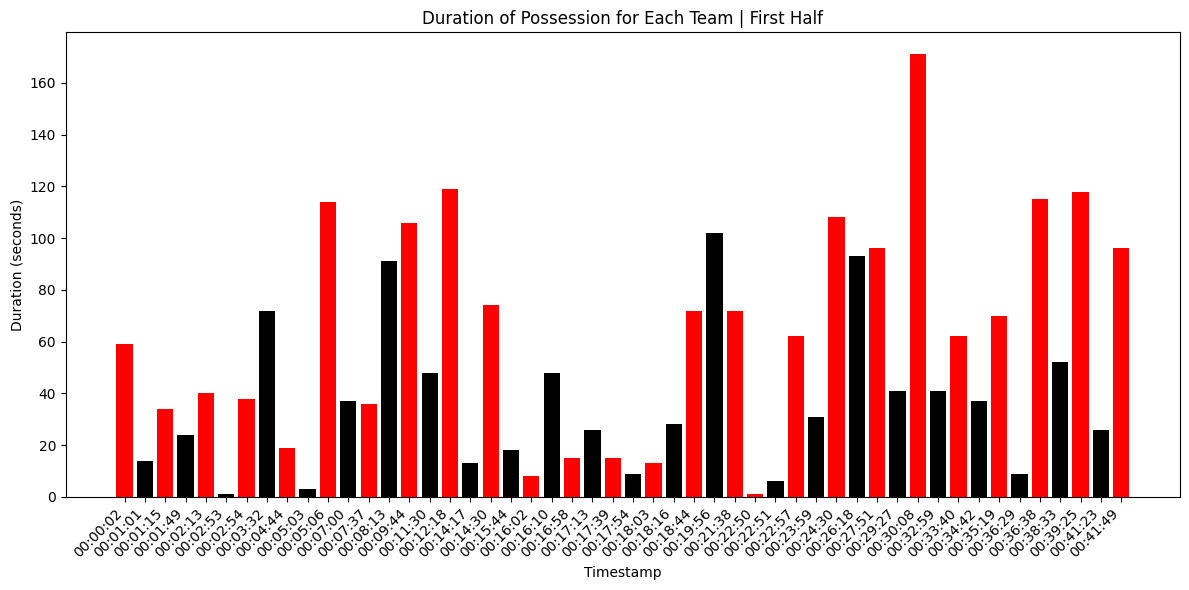

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.bar(first['time_without_date'], first['duration_seconds'], color=first['possession_team'].map({'Arsenal WFC': 'red', 'West Ham United LFC': 'black'}))

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Possession for Each Team | First Half')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
goalsecond

,id,index,match_id,minute,duration,timestamp,period,team,possession_team,play_pattern,...,player_id,type,pass_type,pass_length,location,pass_end_location,carry_end_location,shot_statsbomb_xg,tactics,shot_outcome
2709,3ff97f32-d1d6-4af0-9d84-ad0e7472773e,2079,19724,61,0.480518,00:16:42,2,Arsenal WFC,Arsenal WFC,From Corner,...,10658.0,Shot,NaN,NaN,"[117.0, 40.0]",NaN,NaN,0.303851,NaN,Goal
2711,e143fae8-dfd8-4c71-a29f-6d24dffdca0d,2387,19724,72,1.156795,00:27:07,2,Arsenal WFC,Arsenal WFC,From Throw In,...,15616.0,Shot,NaN,NaN,"[88.0, 35.0]",NaN,NaN,0.021783,NaN,Goal
2716,5f7f8d36-aa5f-4a98-8754-0a916bb9b181,2870,19724,84,1.798148,00:39:55,2,West Ham United LFC,West Ham United LFC,From Free Kick,...,18156.0,Shot,NaN,NaN,"[111.0, 67.0]",NaN,NaN,0.007327,NaN,Goal


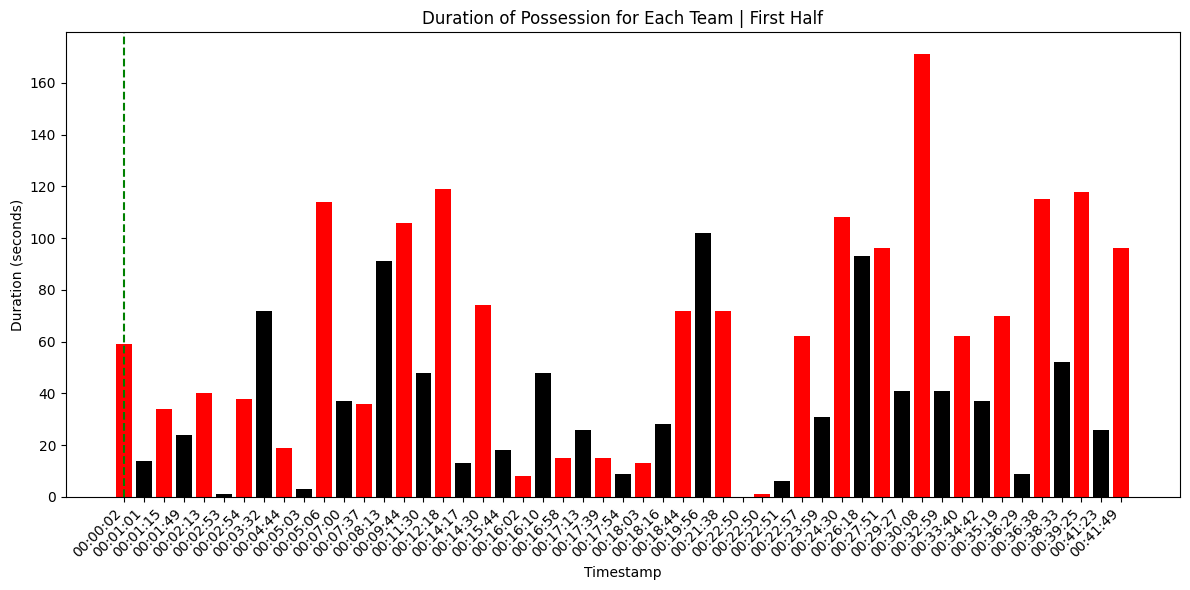

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(first.index, first['duration_seconds'], color=first['possession_team'].map({'Arsenal WFC': 'red', 'West Ham United LFC': 'black'}))

# Find the index where the timestamp is '00:37:00' or the closest available timestamp
xline_index = tacticaltime_first.index[tacticaltime_first['timestamp'] == '00:37:00'].tolist()[0] if '00:37:00' in tacticaltime_first['timestamp'].values else 0

# Draw a vertical line at the corresponding index
plt.axvline(x=xline_index, color='green', linestyle='--', label='Tactical Time First')

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Possession for Each Team | First Half')
plt.xticks(ticks=first.index, labels=first['time_without_date'], rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


# Distance Gained and speed in a Possession Lap

In [33]:
first_location = new_df.groupby('possession_change').first()

# Select the 'location_x' and 'location_y' columns
first_location = first_location[['location_x', 'location_y']]

print(first_location)

                  location_x location_y
possession_change                      
1                       61.0       41.0
2                        6.0       40.0
3                        4.0       38.0
4                       34.0       15.0
5                       55.0       73.0
...                      ...        ...
131                     95.0        1.0
132                     65.0       80.0
133                      6.0       40.0
134                     71.0       17.0
135                    103.0       11.0

[135 rows x 2 columns]


In [34]:
new_df.head(50)

,possession_team,timestamp,period,play_pattern,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,possession_change
0,Arsenal WFC,00:00:02.163000,1,From Kick Off,61.0,41.0,47.0,44.0,nan,NaN,1
1,Arsenal WFC,00:00:03.563000,1,From Kick Off,47.0,44.0,nan,NaN,47.0,44.0,1
2,Arsenal WFC,00:00:03.563000,1,From Kick Off,47.0,44.0,nan,NaN,nan,NaN,1
3,Arsenal WFC,00:00:04.437000,1,From Kick Off,47.0,44.0,40.0,73.0,nan,NaN,1
4,Arsenal WFC,00:00:06.043000,1,From Kick Off,40.0,73.0,nan,NaN,40.0,73.0,1
5,Arsenal WFC,00:00:06.043000,1,From Kick Off,40.0,73.0,nan,NaN,nan,NaN,1
6,Arsenal WFC,00:00:07.776000,1,From Kick Off,40.0,73.0,36.0,45.0,nan,NaN,1
7,Arsenal WFC,00:00:09.940000,1,From Kick Off,36.0,45.0,nan,NaN,nan,NaN,1
8,Arsenal WFC,00:00:09.940000,1,From Kick Off,36.0,45.0,nan,NaN,36.0,45.0,1
9,Arsenal WFC,00:00:11.180000,1,From Kick Off,36.0,45.0,47.0,68.0,nan,NaN,1


In [36]:
last_location = new_df.groupby('possession_change').last()

# Select the 'location_x' and 'location_y' columns
last_location = last_location[['location_x', 'location_y']]

# Merge the first and last location DataFrames on the 'possession_change' column
merged_location = pd.merge(first_location, last_location, on='possession_change', suffixes=('_first', '_last'))

merged_location.head()

,location_x_first,location_y_first,location_x_last,location_y_last
possession_change,,,,
1,61.0,41.0,3.0,41.0
2,6.0,40.0,2.0,37.0
3,4.0,38.0,56.0,69.0
4,34.0,15.0,67.0,9.0
5,55.0,73.0,96.0,1.0


In [41]:
import pandas as pd


merged_location['location_x_first'] = pd.to_numeric(merged_location['location_x_first'], errors='coerce')
merged_location['location_y_first'] = pd.to_numeric(merged_location['location_y_first'], errors='coerce')
merged_location['location_x_last'] = pd.to_numeric(merged_location['location_x_last'], errors='coerce')
merged_location['location_y_last'] = pd.to_numeric(merged_location['location_y_last'], errors='coerce')

merged_location['distance'] = ((merged_location['location_x_last'] - merged_location['location_x_first']) ** 2 +
                               (merged_location['location_y_last'] - merged_location['location_y_first']) ** 2) ** 0.5

merged_location

#pythogoreus theorum

,location_x_first,location_y_first,location_x_last,location_y_last,distance
possession_change,,,,,
1,61.0,41.0,3.0,41.0,58.000000
2,6.0,40.0,2.0,37.0,5.000000
3,4.0,38.0,56.0,69.0,60.539243
4,34.0,15.0,67.0,9.0,33.541020
5,55.0,73.0,96.0,1.0,82.855296
...,...,...,...,...,...
131,95.0,1.0,66.0,79.0,83.216585
132,65.0,80.0,2.0,40.0,74.625733
133,6.0,40.0,55.0,63.0,54.129474


In [42]:
num_nan = merged_location.isna().sum().sum()

print("Number of NaN values in the dataset:", num_nan)

Number of NaN values in the dataset: 12


In [44]:
nan_mask = merged_location.isna()

rows_with_nan = merged_location[nan_mask.any(axis=1)]

print("Rows with NaN values:")
print(rows_with_nan)

Rows with NaN values:
                   location_x_first  location_y_first  location_x_last  \
possession_change                                                        
30                             30.0               1.0              NaN   
41                             33.0              44.0              NaN   
51                             57.0              80.0              NaN   
54                              NaN              41.0             47.0   
105                           101.0               1.0              NaN   
135                           103.0              11.0              NaN   

                   location_y_last  distance  
possession_change                             
30                             6.0       NaN  
41                            20.0       NaN  
51                            41.0       NaN  
54                            75.0       NaN  
105                           42.0       NaN  
135                            9.0       NaN  


In [45]:
merged_df = pd.merge(result_df, merged_location, on='possession_change', how='outer')

merged_df

,possession_change,time_without_date,timestamp_end,period,duration_seconds,possession_team,location_x_first,location_y_first,location_x_last,location_y_last,distance
0,1,00:00:02,00:01:01,1,59.0,Arsenal WFC,61.0,41.0,3.0,41.0,58.000000
1,2,00:01:01,00:01:15,1,14.0,West Ham United LFC,6.0,40.0,2.0,37.0,5.000000
2,3,00:01:15,00:01:49,1,34.0,Arsenal WFC,4.0,38.0,56.0,69.0,60.539243
3,4,00:01:49,00:02:13,1,24.0,West Ham United LFC,34.0,15.0,67.0,9.0,33.541020
4,5,00:02:13,00:02:53,1,40.0,Arsenal WFC,55.0,73.0,96.0,1.0,82.855296
...,...,...,...,...,...,...,...,...,...,...,...
142,131,00:44:14,00:44:43,2,29.0,Arsenal WFC,95.0,1.0,66.0,79.0,83.216585
143,132,00:44:43,00:45:47,2,64.0,West Ham United LFC,65.0,80.0,2.0,40.0,74.625733
144,133,00:45:47,00:45:52,2,5.0,Arsenal WFC,6.0,40.0,55.0,63.0,54.129474
145,134,00:45:52,00:47:24,2,92.0,West Ham United LFC,71.0,17.0,18.0,70.0,74.953319


In [47]:
merged_df['Pace'] = ((merged_df['distance'] / merged_df['duration_seconds']))
merged_df

,possession_change,time_without_date,timestamp_end,period,duration_seconds,possession_team,location_x_first,location_y_first,location_x_last,location_y_last,distance,Pace
0,1,00:00:02,00:01:01,1,59.0,Arsenal WFC,61.0,41.0,3.0,41.0,58.000000,0.983051
1,2,00:01:01,00:01:15,1,14.0,West Ham United LFC,6.0,40.0,2.0,37.0,5.000000,0.357143
2,3,00:01:15,00:01:49,1,34.0,Arsenal WFC,4.0,38.0,56.0,69.0,60.539243,1.780566
3,4,00:01:49,00:02:13,1,24.0,West Ham United LFC,34.0,15.0,67.0,9.0,33.541020,1.397542
4,5,00:02:13,00:02:53,1,40.0,Arsenal WFC,55.0,73.0,96.0,1.0,82.855296,2.071382
...,...,...,...,...,...,...,...,...,...,...,...,...
142,131,00:44:14,00:44:43,2,29.0,Arsenal WFC,95.0,1.0,66.0,79.0,83.216585,2.869537
143,132,00:44:43,00:45:47,2,64.0,West Ham United LFC,65.0,80.0,2.0,40.0,74.625733,1.166027
144,133,00:45:47,00:45:52,2,5.0,Arsenal WFC,6.0,40.0,55.0,63.0,54.129474,10.825895
145,134,00:45:52,00:47:24,2,92.0,West Ham United LFC,71.0,17.0,18.0,70.0,74.953319,0.814710


In [48]:
merged_df.dropna(inplace = True)
merged_df

,possession_change,time_without_date,timestamp_end,period,duration_seconds,possession_team,location_x_first,location_y_first,location_x_last,location_y_last,distance,Pace
0,1,00:00:02,00:01:01,1,59.0,Arsenal WFC,61.0,41.0,3.0,41.0,58.000000,0.983051
1,2,00:01:01,00:01:15,1,14.0,West Ham United LFC,6.0,40.0,2.0,37.0,5.000000,0.357143
2,3,00:01:15,00:01:49,1,34.0,Arsenal WFC,4.0,38.0,56.0,69.0,60.539243,1.780566
3,4,00:01:49,00:02:13,1,24.0,West Ham United LFC,34.0,15.0,67.0,9.0,33.541020,1.397542
4,5,00:02:13,00:02:53,1,40.0,Arsenal WFC,55.0,73.0,96.0,1.0,82.855296,2.071382
...,...,...,...,...,...,...,...,...,...,...,...,...
141,130,00:44:07,00:44:14,2,7.0,West Ham United LFC,6.0,45.0,25.0,76.0,36.359318,5.194188
142,131,00:44:14,00:44:43,2,29.0,Arsenal WFC,95.0,1.0,66.0,79.0,83.216585,2.869537
143,132,00:44:43,00:45:47,2,64.0,West Ham United LFC,65.0,80.0,2.0,40.0,74.625733,1.166027
144,133,00:45:47,00:45:52,2,5.0,Arsenal WFC,6.0,40.0,55.0,63.0,54.129474,10.825895


In [60]:
firstdf = merged_df[merged_df['period'] == 1]
seconddf = merged_df[merged_df['period'] == 2]

seconddf = seconddf.iloc[33:]
firstdf = firstdf.iloc[:48]

firstdf.to_excel('firstdf.xlsx', index=False)

seconddf.to_excel('seconddf.xlsx', index=False)